
# Zadania dotyczące szeregów czasowych z wykorzystaniem modeli klasycznych (ARIMA, SARIMA)

Szeregi czasowe to dane zebrane w określonych przedziałach czasowych, takich jak dzienne temperatury, miesięczna sprzedaż, czy kwartalne wyniki finansowe. Kluczową cechą tych danych jest ich uporządkowanie w czasie, co oznacza, że każda wartość może zależeć od poprzednich. Typowe elementy szeregów czasowych to trend (długoterminowa tendencja wzrostowa lub spadkowa), sezonowość (powtarzające się wzorce, np. w skali rocznej lub miesięcznej), cykl (dłuższe, nieregularne wahania) oraz reszty (losowe zmiany niepodlegające trendowi ani sezonowości). 

Analiza szeregów czasowych pozwala zrozumieć przeszłe wzorce, prognozować przyszłe wartości i wykrywać anomalie. Proces analizy obejmuje analizę wstępną (np. identyfikację trendu i sezonowości), przekształcenie danych (np. różnicowanie w celu uczynienia danych stacjonarnymi), budowę modelu (np. ARIMA, SARIMA) oraz ocenę wyników przy użyciu metryk takich jak RMSE czy MAE.

Model ARIMA (Autoregressive Integrated Moving Average) jest klasycznym narzędziem do analizy szeregów czasowych. Składa się z trzech komponentów: AR (autoregresja, gdzie obecna wartość jest sumą ważonych wartości poprzednich), I (różnicowanie w celu uczynienia danych stacjonarnymi) oraz MA (średnia ruchoma, uwzględniająca wpływ błędów z przeszłości). Model ARIMA wymaga doboru trzech parametrów: p (liczba opóźnień w autoregresji), d (liczba różnicowań) i q (liczba opóźnień w średniej ruchomej).

SARIMA (Seasonal ARIMA) to rozszerzenie ARIMA, które dodatkowo uwzględnia sezonowość. Oprócz parametrów p, d, q, model SARIMA wymaga zdefiniowania parametrów sezonowych P, D, Q (autokorelacja, różnicowanie i średnia ruchoma dla komponentu sezonowego) oraz okresu sezonowości m (np. 12 dla danych miesięcznych). SARIMA jest szczególnie przydatna w analizie danych z wyraźnymi cyklami, takich jak roczna sprzedaż czy sezonowe wahania temperatury.

Podsumowując, ARIMA jest idealna dla danych stacjonarnych bez wyraźnej sezonowości, podczas gdy SARIMA sprawdza się w analizie danych z sezonowymi wzorcami. Oba modele są szeroko stosowane w prognozowaniu z uwagi na swoją skuteczność i zdolność do interpretacji zależności czasowych.

Poniższe zadania demonstrują, jak zastosować modele ARIMA oraz SARIMA do analizy szeregów czasowych.


## Zadanie 1: Prognozowanie sprzedaży w sklepie internetowym

Twoim celem jest przewidywanie przyszłej sprzedaży w sklepie internetowym na podstawie danych historycznych z ostatnich dwóch lat. Dane te przedstawiają dzienną sprzedaż produktów, która może zawierać trend (np. wzrost zainteresowania), sezonowość (np. wyższa sprzedaż w weekendy lub w okresie świątecznym) oraz losowe zakłócenia. Wykorzystasz metodę ARIMA, która jest skutecznym narzędziem do modelowania i prognozowania szeregów czasowych, szczególnie tych stacjonarnych.

Cele zadania:

- Przeprowadzenie analizy danych, aby zrozumieć ich strukturę.
- Wykrycie trendów, sezonowości i losowych fluktuacji.
- Sprawdzenie, czy dane są stacjonarne, a jeśli nie, zastosowanie odpowiednich przekształceń, np. różnicowania.
- Stworzenie modelu ARIMA, dopasowanie go do danych i optymalizacja parametrów (p,d,q) na podstawie wykresów ACF (autokorelacji) i PACF (częściowej autokorelacji).
- Wygenerowanie prognozy sprzedaży na najbliższe 30 dni.
- Wizualizacja wyników, aby zaprezentować prognozę i porównać ją z danymi historycznymi.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from pmdarima.arima import auto_arima

In [3]:
# Wczytanie danych
data = pd.read_csv('sales.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

,Sales
Date,
2022-01-01,207.622728
2022-01-02,198.370016
2022-01-03,210.431172
2022-01-04,223.833002
2022-01-05,197.746760


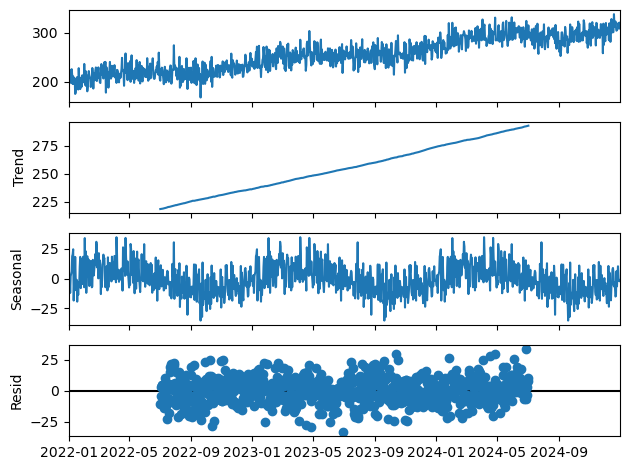

In [4]:
# Analiza danych: dekompozycja trendu i sezonowości
decomposition = seasonal_decompose(data, model='additive', period=365)
decomposition.plot()
plt.show()

In [5]:
result = adfuller(data['Sales'])
print('p-value:', result[1])  # Jeśli p-value < 0.05, dane są stacjonarne
data_diff = data['Sales'].diff().dropna()
result = adfuller(data_diff)
print('p-value:', result[1])  # Jeśli p-value < 0.05, dane są stacjonarne

p-value: 0.7978886844043065
p-value: 2.2364044660400676e-20


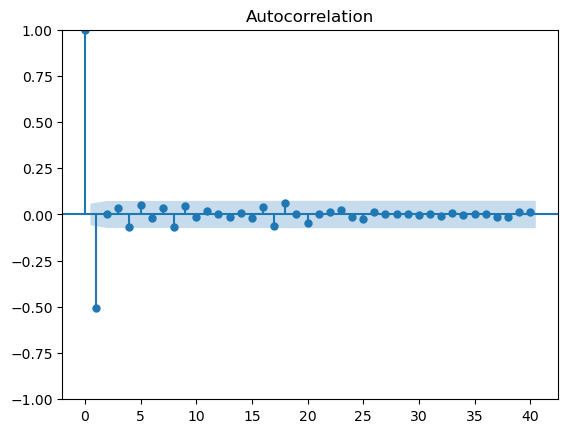

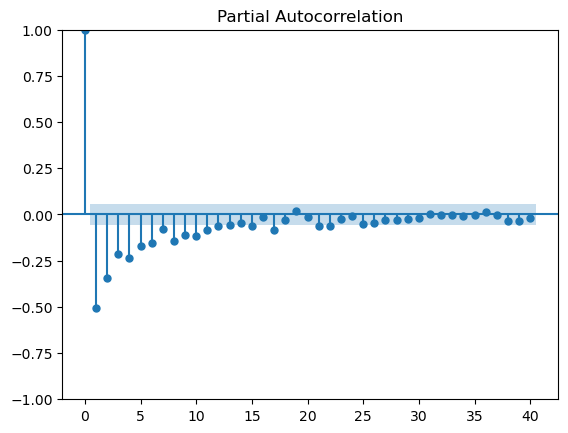

In [6]:
plot_acf(data_diff, lags=40)
plot_pacf(data_diff, lags=40)
plt.show()

c:\Users\piotr\anaconda3\envs\lab_1_srodowisko\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\piotr\anaconda3\envs\lab_1_srodowisko\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\piotr\anaconda3\envs\lab_1_srodowisko\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


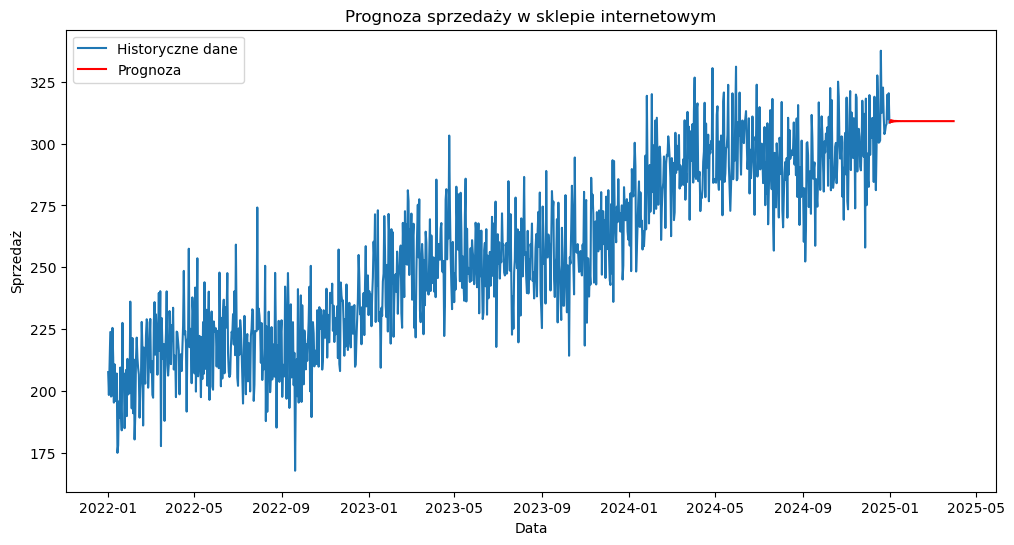

In [7]:

# Budowa modelu ARIMA
# Wybieramy parametry p, d, q na podstawie wstępnej analizy (np. wykres ACF/PACF)
model = ARIMA(data, order=(2, 1, 2))
fit = model.fit()

# Prognoza na 90 dni
forecast_steps = 90  # Liczba dni do prognozy
forecast = fit.forecast(steps=forecast_steps)  # Prognoza na kolejne dni

last_date = pd.to_datetime(data.index[-1])
forecast_dates = [last_date + pd.Timedelta(days=i) for i in range(1, forecast_steps + 1)]

# Tworzenie serii czasowej z prognozy
forecast_series = pd.Series(forecast, index=forecast_dates)


# Wizualizacja prognozy
plt.figure(figsize=(12, 6))
plt.plot(data['Sales'], label='Historyczne dane')
plt.plot(forecast_series, label='Prognoza', color='red')
plt.xlabel('Data')
plt.ylabel('Sprzedaż')
plt.title('Prognoza sprzedaży w sklepie internetowym')
plt.legend()
plt.show()

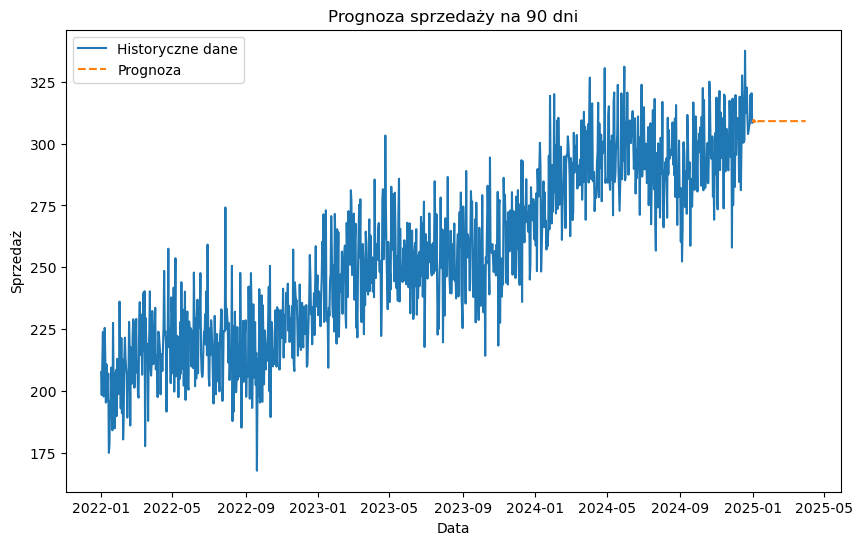

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], label='Historyczne dane')
plt.plot(forecast_series.index, forecast_series, label='Prognoza', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Sprzedaż')
plt.title('Prognoza sprzedaży na 90 dni')
plt.legend()
plt.show()

## Zadanie 2: Prognozowanie produkcji przemysłowej

Twoim celem jest stworzenie prognozy miesięcznej produkcji przemysłowej w fabryce na podstawie danych historycznych z ostatnich 3 lat. Dane te mogą zawierać zarówno długoterminowy trend, jak i sezonowość, związane np. z cyklami produkcyjnymi lub zmianami popytu. W tym zadaniu należy najpierw sprawdzić, czy dane są stacjonarne (tj. czy ich średnia i wariancja nie zmieniają się w czasie), a jeśli nie, zastosować różnicowanie. Następnie stworzysz model ARIMA, który posłuży do przewidywania produkcji na najbliższe 6 miesięcy.

Cele zadania:

- Analiza danych: Zrozumienie struktury szeregu czasowego poprzez wizualizację i identyfikację trendu oraz ewentualnej sezonowości.
- Stacjonaryzacja danych: W przypadku niestacjonarności zastosowanie różnicowania w celu uzyskania stabilności danych.
- Budowa modelu ARIMA: Dopasowanie parametrów (p,d,q), aby najlepiej odzwierciedlić wzorce w danych.
- Prognozowanie na 6 miesięcy: Generowanie prognozy przy użyciu wytrenowanego modelu.
- Wizualizacja: Prezentacja wyników na wykresie, łącząca dane historyczne i prognozę.

C:\Users\piotr\AppData\Local\Temp\ipykernel_26716\1015798398.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_prod = data_prod.asfreq('M')  # 'M' oznacza miesięczną częstotliwość


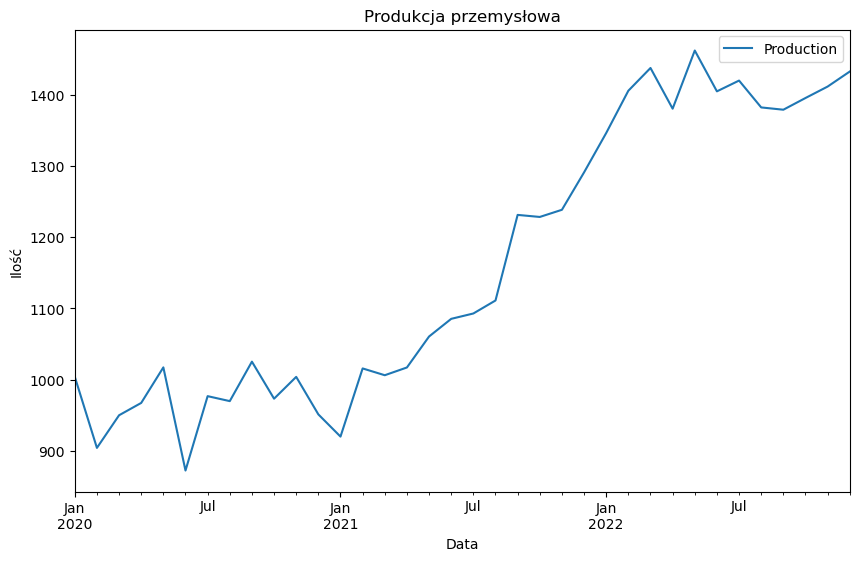

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Wczytanie danych
data_prod = pd.read_csv('production.csv')
data_prod['Date'] = pd.to_datetime(data_prod['Date'])
data_prod.set_index('Date', inplace=True)
data_prod = data_prod.asfreq('M')  # 'M' oznacza miesięczną częstotliwość
# Wizualizacja danych
data_prod.plot(title='Produkcja przemysłowa', ylabel='Ilość', xlabel='Data', figsize=(10, 6))
plt.show()

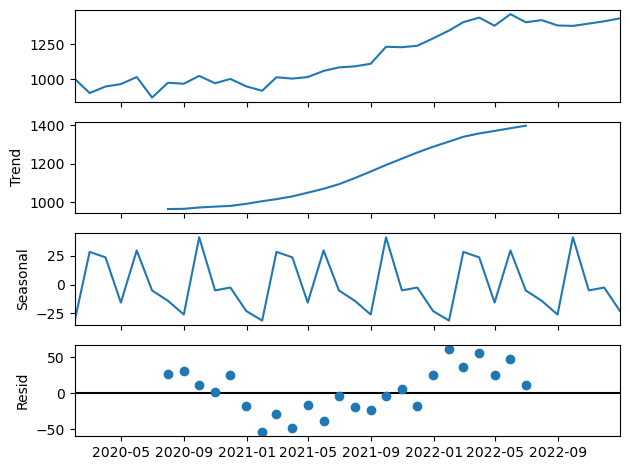

In [10]:
decomposition_prod = seasonal_decompose(data_prod, model='additive', period=12)
decomposition_prod.plot()
plt.show()

In [11]:
result = adfuller(data_prod)
print('p-value:', result[1])  # Jeśli p-value < 0.05, dane są stacjonarne
data_diff = data_prod.diff().dropna()
result = adfuller(data_diff)
print('p-value:', result[1])  # Jeśli p-value < 0.05, dane są stacjonarne

p-value: 0.9066061118698209
p-value: 1.810923116407747e-15


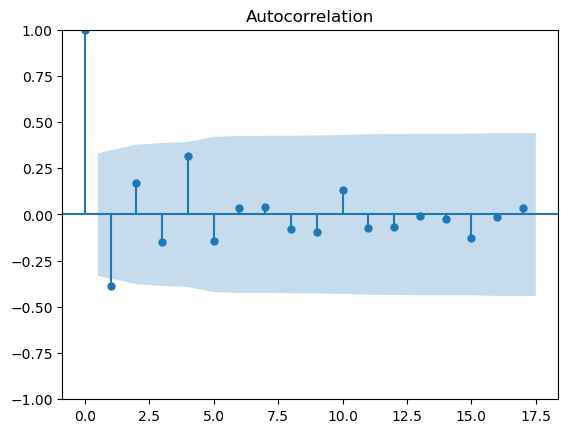

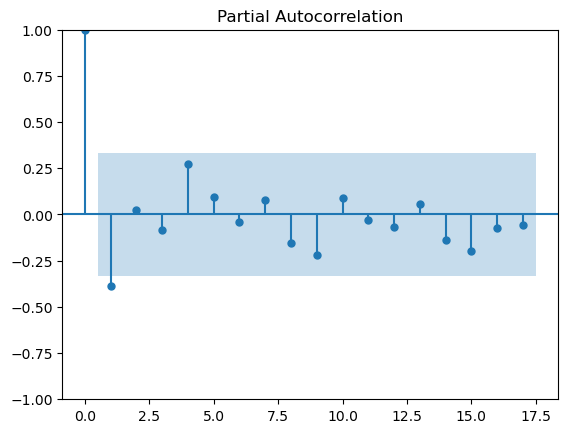

In [12]:
plot_acf(data_diff, lags=17)
plot_pacf(data_diff, lags=17)
plt.show()

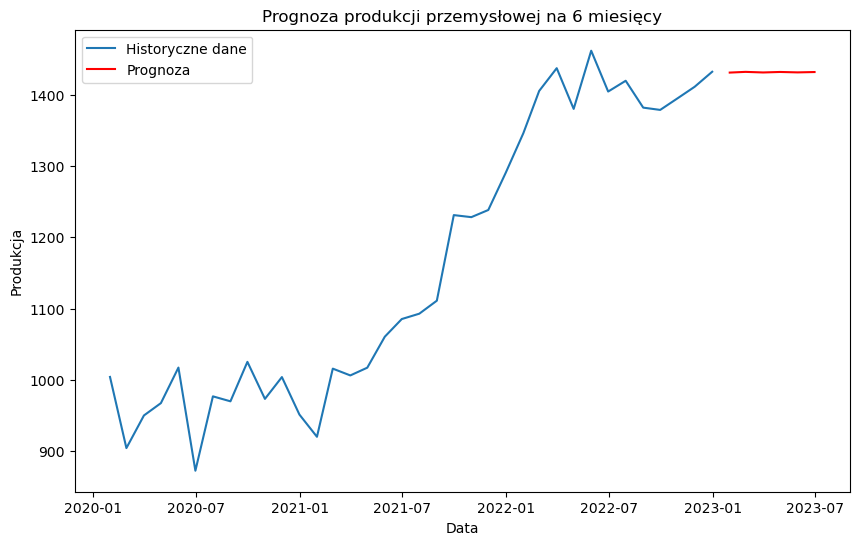

In [13]:
# Budowa modelu ARIMA
model = ARIMA(data_prod, order=(1, 1, 1))
fit = model.fit()
# Prognoza na 6 miesięcy
forecast = fit.forecast(steps=6)

last_date_prod = pd.to_datetime(data_prod.index[-1])

forecast_dates = [last_date_prod + pd.DateOffset(months=i) for i in range(1, 7)]

# Tworzenie serii czasowej z prognozy
forecast_series = pd.Series(forecast, index=forecast_dates)

# Wizualizacja prognozy
plt.figure(figsize=(10, 6))
plt.plot(data_prod, label='Historyczne dane')
plt.plot(forecast_series, label='Prognoza', color='red')
plt.xlabel('Data')
plt.ylabel('Produkcja')
plt.title('Prognoza produkcji przemysłowej na 6 miesięcy')
plt.legend()
plt.show()


## Zadanie 3: Prognozowanie zużycia energii

Twoim zadaniem jest przeanalizowanie danych o godzinowym zużyciu energii elektrycznej w mieście z ostatnich 6 miesięcy oraz stworzenie prognozy na najbliższe 7 dni. Zużycie energii może wykazywać sezonowość dzienną (np. większe zużycie w godzinach szczytu) lub tygodniową (np. różnice między dniami roboczymi a weekendami). Użyjesz modelu SARIMA, który uwzględnia zarówno krótkoterminowe, jak i sezonowe wzorce w danych, aby stworzyć dokładną prognozę.

Cele zadania:

- Analiza danych: Zidentyfikowanie trendów i sezonowości w danych przy użyciu dekompozycji szeregu czasowego.
- Budowa modelu SARIMA: Uwzględnienie sezonowości dziennej (24 godziny) oraz ewentualnych trendów długoterminowych.
- Prognozowanie: Generowanie prognozy godzinowego zużycia energii na 7 dni (168 godzin).
- Wizualizacja wyników: Porównanie prognozy z danymi historycznymi.

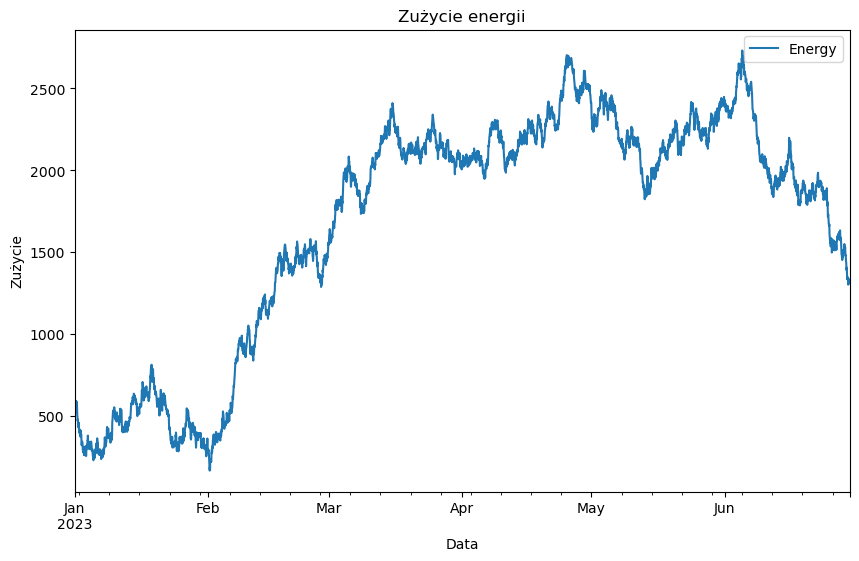

In [14]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Wczytanie danych
data_energy = pd.read_csv('energy.csv')
data_energy['Date'] = pd.to_datetime(data_energy['Date'])
data_energy.set_index('Date', inplace=True)
data_energy = data_energy.asfreq('h')  # 'H' oznacza godzinową częstotliwość
# Wizualizacja danych
data_energy.plot(title='Zużycie energii', ylabel='Zużycie', xlabel='Data', figsize=(10, 6))
plt.show()

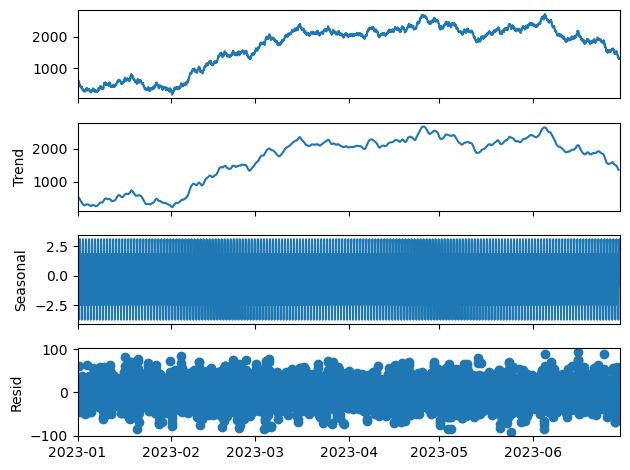

In [15]:
# Analiza trendu i sezonowości
decomposition = seasonal_decompose(data_energy, model='additive', period=24)
decomposition.plot()
plt.show()

In [16]:
result = adfuller(data_energy)
print('p-value:', result[1])  # Jeśli p-value < 0.05, dane są stacjonarne
data_diff = data['Sales'].diff().dropna()
result = adfuller(data_diff)
print('p-value:', result[1])  # Jeśli p-value < 0.05, dane są stacjonarne

p-value: 0.5036404071508777
p-value: 2.2364044660400676e-20


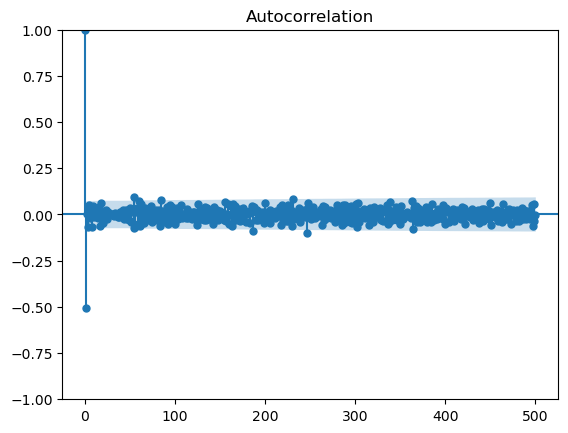

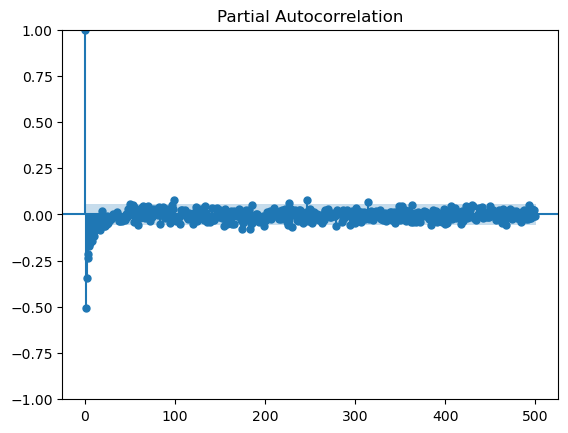

In [17]:
plot_acf(data_diff, lags=500)
plot_pacf(data_diff, lags=500)
plt.show()

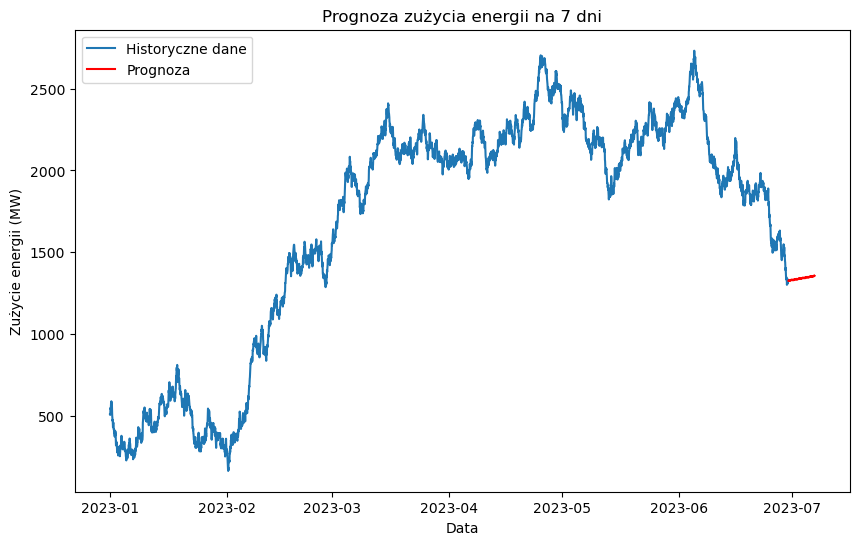

In [18]:
# Budowa modelu SARIMA
model = SARIMAX(data_energy, order=(2, 1, 3), seasonal_order=(1, 1, 1, 24))
fit = model.fit()

# Prognoza na 7 dni
forecast = fit.forecast(steps=7*24)
forecast_index = pd.date_range(start=data_energy.index[-1], periods=7*24, freq='h')
forecast_series = pd.Series(forecast, index=forecast_index)

# Wizualizacja prognozy
plt.figure(figsize=(10, 6))
plt.plot(data_energy, label='Historyczne dane')
plt.plot(forecast_series, label='Prognoza', color='red')
plt.xlabel('Data')
plt.ylabel('Zużycie energii (MW)')
plt.title('Prognoza zużycia energii na 7 dni')
plt.legend()
plt.show()

## Zadanie 4: Prognozowanie pogody

Twoim celem jest analiza danych dotyczących dziennej temperatury w Twoim mieście z ostatnich 3 lat oraz stworzenie prognozy na najbliższe 14 dni. Dane te mogą zawierać sezonowe wzorce, takie jak cykle roczne (np. lato i zima) oraz trend (np. globalne ocieplenie). Użyjesz modelu SARIMA, który uwzględnia zarówno krótkoterminowe, jak i sezonowe wzorce w danych, aby stworzyć dokładną prognozę przyszłych temperatur.

Cele zadania:

- Analiza danych: Zidentyfikowanie sezonowości i trendu w danych przy użyciu dekompozycji szeregu czasowego.
- Budowa modelu SARIMA: Uwzględnienie sezonowości rocznej (365 dni) oraz krótkoterminowych wzorców.
- Prognozowanie: Generowanie prognozy dziennej temperatury na najbliższe 14 dni.
- Wizualizacja: Prezentacja wyników prognozy na tle danych historycznych.

730


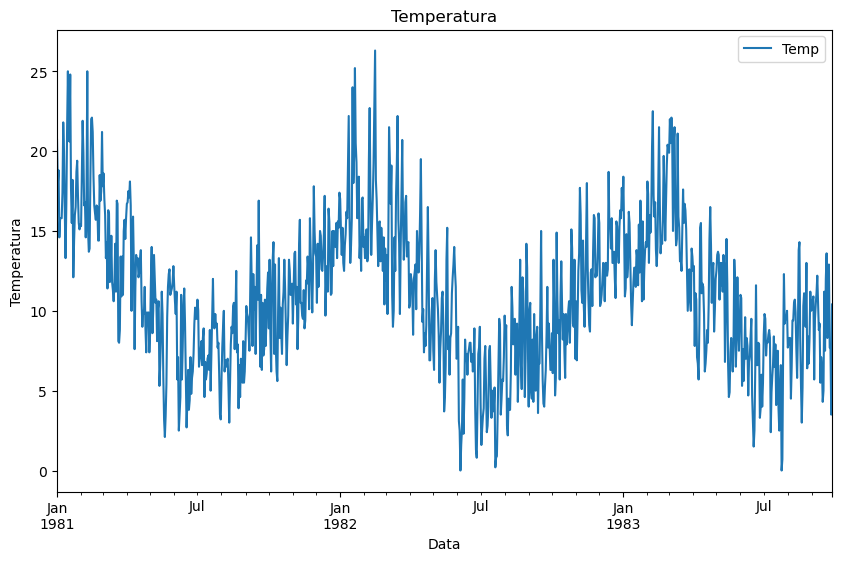

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Wczytanie danych 
data_weather = pd.read_csv('weather.csv')
data_weather['Date'] = pd.to_datetime(data_weather['Date'])
data_weather.set_index('Date', inplace=True)
data_weather = data_weather.asfreq('D')  # 'D' oznacza dzienną częstotliwość
print(int(data_weather.size/5))
train_num = int(data_weather.size/5)
data_weather_train = data_weather[:1000]
# Wizualizacja danych
data_weather_train.plot(title='Temperatura', ylabel='Temperatura', xlabel='Data', figsize=(10, 6))
plt.show()

In [10]:
missing_data = data_weather_train.isna()

# Pokaż liczbę pustych danych w każdej kolumnie
print(missing_data.sum())
missing_rows = data_weather_train[data_weather_train.isna().any(axis=1)]
print(missing_rows)
data_weather_train = data_weather_train.dropna()

Temp    0
dtype: int64
Empty DataFrame
Columns: [Temp]
Index: []


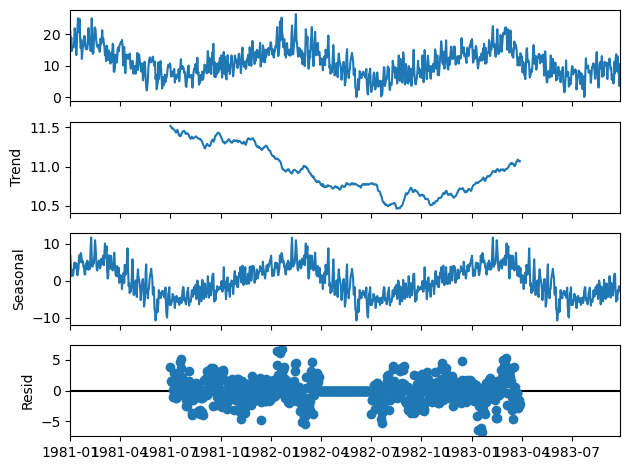

In [11]:
decomposition = seasonal_decompose(data_weather_train, model='additive', period=365)
decomposition.plot()
plt.show()

In [14]:
result = adfuller(data_weather_train)
print('p-value:', result[1])  # Jeśli p-value < 0.05, dane są stacjonarne
data_diff = data_weather_train.diff().dropna()
result = adfuller(data_diff)
print('p-value:', result[1])  # Jeśli p-value < 0.05, dane są stacjonarne

p-value: 0.09656689009336478
p-value: 1.2735111678001617e-22


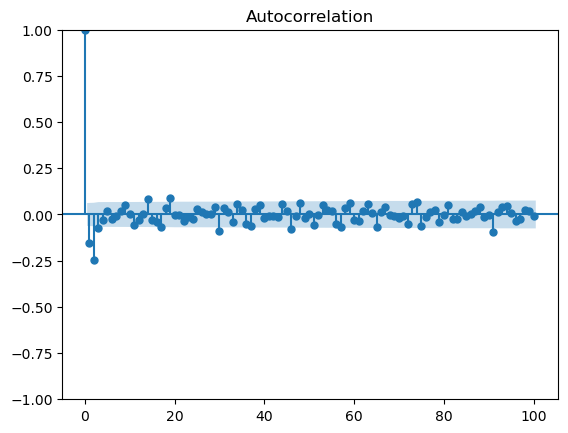

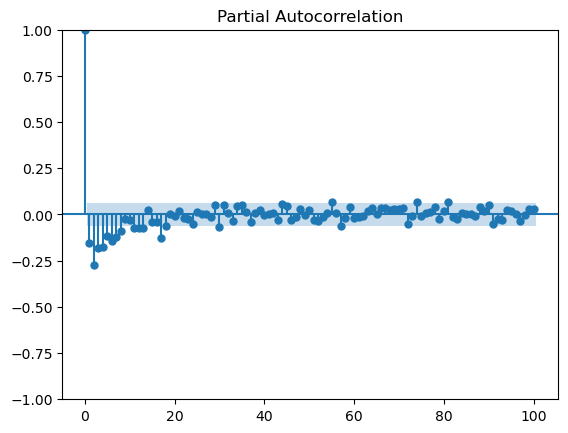

In [15]:
plot_acf(data_diff, lags=100)
plot_pacf(data_diff, lags=100)
plt.show()

In [19]:
# Analiza trendu i sezonowości


# Budowa modelu SARIMA
model = SARIMAX(data_weather_train, order=(2, 1, 4), seasonal_order=(1, 1, 1, 365))
fit = model.fit()

# Prognoza na 14 dni
forecast = fit.forecast(steps=14)
forecast_index = pd.date_range(start=data_weather_train.index[-1], periods=14, freq='D')
forecast_series = pd.Series(forecast.values, index=forecast_index)
# Wizualizacja prognozy
plt.figure(figsize=(10, 6))
plt.plot(data_weather_train, label='Historyczne dane')
plt.plot(forecast_series, label='Prognoza', color='red')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.title('Prognoza temperatury na 14 dni')
plt.legend()
plt.show()


c:\Users\piotr\anaconda3\envs\lab_1_srodowisko\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


KeyboardInterrupt: 

In [ ]:
model_auto = pm.auto_arima(data_weather, seasonal=True, m=365)
fit_auto = model_auto.fit()

# Prognoza na 14 dni
forecast_auto = fit_auto.forecast(steps=14)
forecast_index_auto = pd.date_range(start=data_weather_train.index[-1], periods=14, freq='D')
forecast_series_auto = pd.Series(forecast_auto.values, index=forecast_index_auto)
# Wizualizacja prognozy
plt.figure(figsize=(10, 6))
plt.plot(data_weather_train, label='Historyczne dane')
plt.plot(forecast_series_auto, label='Prognoza', color='red')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.title('Prognoza temperatury na 14 dni')
plt.legend()
plt.show()

## Dodatkowe uwagi do zadań

Poniżej znajdują sie opcjonalne warianty i dodatkowe zadania, które możesz zaimplementować do powyższych kodów w celu ich usprawnienia:

- Rozważ zwiększenie okresu prognozy, aby ocenić działanie modelu w dłuższym czasie.
- Wykorzystaj funkcję `auto_arima` z biblioteki `pmdarima` do automatycznego doboru parametrów modelu.
- Przeprowadź test Dickeya-Fullera, aby sprawdzić stacjonarność danych i zastosuj różnicowanie, jeśli to konieczne.
- Podziel dane na zbiór treningowy i testowy, aby ocenić dokładność modelu na nieznanych danych.
- Dla danych o wyraźnej sezonowości rozważ użycie modelu SARIMA.
- Testuj różne warianty modeli SARIMA, aby uwzględnić zmienność sezonowości i trendów w czasie.
